<a href="https://colab.research.google.com/github/mcfatbeard57/Collabs_notebooks/blob/master/Tensor_Flow_Basic_Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
print('Jelly Boy! Mcfatbeard')

Jelly Boy! Mcfatbeard


In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [0]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

In [8]:
type(model)

tensorflow.python.keras.engine.sequential.Sequential

In [0]:
model.fit?

In [15]:
from google.colab import files
uploaded = files.upload()

Saving fake_reg.csv to fake_reg.csv


In [0]:
import io
import pandas as pd
df2 = pd.read_csv(io.BytesIO(uploaded['fake_reg.csv']))

In [18]:
df2.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
# Convert Pandas to Numpy for Keras

# Features
X = df2[['feature1','feature2']].values

# Label
y = df2['price'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
#help(MinMaxScaler)

In [0]:
scaler = MinMaxScaler()

In [25]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
model.fit(X_train,y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 0s 1ms/step - loss: 256754.4062
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 256681.0781
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 256612.4531
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 256557.0938
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 256499.2188
Epoch 6/250
22/22 [==============================] - 0s 1ms/step - loss: 256435.2656
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 256364.2500
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 256285.8906
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 256199.6562
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 256104.8750
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 256000.4531
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

In [31]:
model.history.history

{'loss': [256754.40625,
  256681.078125,
  256612.453125,
  256557.09375,
  256499.21875,
  256435.265625,
  256364.25,
  256285.890625,
  256199.65625,
  256104.875,
  256000.453125,
  255885.984375,
  255760.921875,
  255624.15625,
  255475.046875,
  255313.421875,
  255136.875,
  254946.15625,
  254740.203125,
  254518.375,
  254277.46875,
  254019.046875,
  253742.859375,
  253445.578125,
  253126.71875,
  252785.03125,
  252422.703125,
  252036.609375,
  251622.421875,
  251183.65625,
  250719.203125,
  250226.78125,
  249703.34375,
  249147.359375,
  248562.0625,
  247944.875,
  247295.5625,
  246609.21875,
  245886.515625,
  245127.65625,
  244326.71875,
  243487.46875,
  242607.265625,
  241687.6875,
  240726.671875,
  239716.78125,
  238662.40625,
  237564.0625,
  236417.515625,
  235222.921875,
  233972.828125,
  232671.90625,
  231322.625,
  229922.3125,
  228465.25,
  226951.59375,
  225384.015625,
  223755.453125,
  222065.34375,
  220321.171875,
  218519.265625,
  216648.

In [34]:
loss_data = pd.DataFrame(model.history.history)
loss_data.head()

,loss
0,256754.406250
1,256681.078125
2,256612.453125
3,256557.093750
4,256499.218750


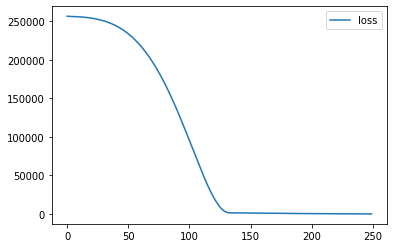

In [33]:
loss_data.plot()

In [38]:
model.evaluate(X_train, y_train)

22/22 [==============================] - 0s 1ms/step - loss: 81.4234


81.42339324951172

In [37]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 1ms/step - loss: 79.8544


79.85440063476562

In [0]:
test_predictions = model.predict(X_test)

In [42]:
type(test_predictions)

numpy.ndarray

In [0]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [0]:
pred_df = pd.DataFrame(y_test, columns = ['True Y Value'])

In [0]:
pred_df = pd.concat([pred_df,test_predictions],axis =1)

In [0]:
pred_df.columns = ['True Y Value','Model Predictions']

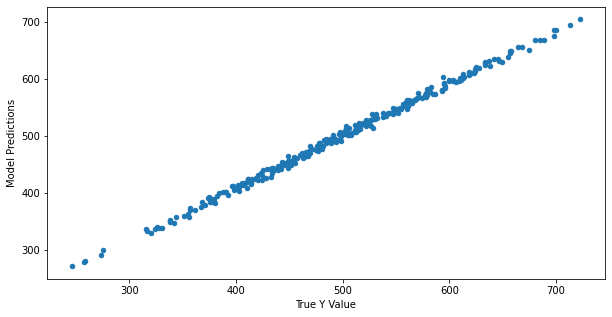

In [60]:
pred_df.plot.scatter(x='True Y Value', y='Model Predictions', figsize =(10,5))

In [0]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [65]:
mean_absolute_error(pred_df['True Y Value'],pred_df['Model Predictions'])

7.297771476557176

In [0]:
new_gem = [[998,1000]]

In [0]:
new_gem = scaler.transform(new_gem)

In [68]:
model.predict(new_gem)

array([[428.8555]], dtype=float32)

In [0]:
from tensorflow.keras.models import load_model

In [0]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [0]:
later_model = load_model('my_model.h5')

In [73]:
later_model.predict(new_gem)

array([[428.8555]], dtype=float32)